# K-Means

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap

cmap = colors.ListedColormap(["#fffd7a", "#fcd421", "#ff950a", "#66baac", "#066159", "#011212"])


In [39]:
%store -r final
final.head()

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruit,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Adults,Children,Household_Size,Spent
0,2,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,971.0,58,1,0,1,1617
1,2,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,125.0,61,1,2,3,27
2,2,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,472.0,50,2,0,2,776
3,2,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,65.0,31,2,1,3,53
4,4,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,321.0,34,2,1,3,422


In [40]:
%store -r PC
PC
PC.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2212.0,-1.027910e-16,2.799612,-5.894749,-2.497218,-0.735551,2.433541,7.289119
PC2,2212.0,1.284887e-17,1.632624,-3.873841,-1.309499,-0.170296,1.165704,6.329633
PC3,2212.0,3.533440e-17,1.221943,-3.531818,-0.826936,-0.023560,0.800150,6.627395
Clusters,2212.0,1.440778e+00,1.144321,0.000000,0.000000,1.000000,2.000000,3.000000


## Determine Number of Clusters

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

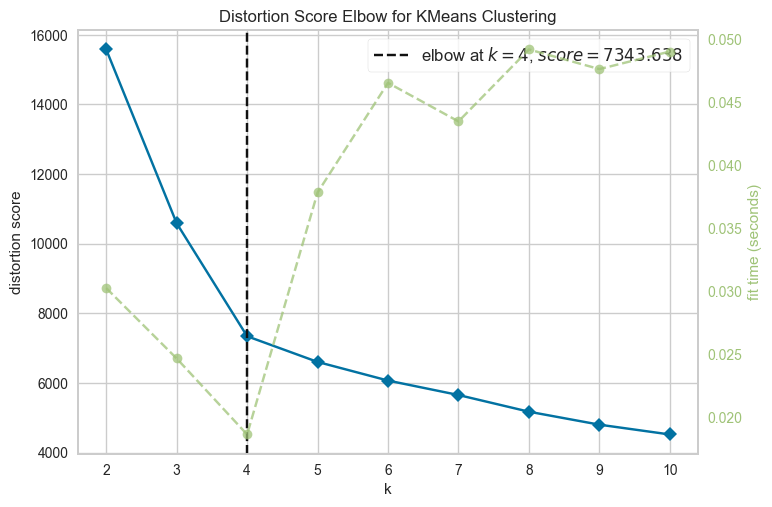

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Quick examination of elbow method to find numbers of clusters to make.
Elbow_M = KElbowVisualizer(KMeans())
Elbow_M.fit(PC)
Elbow_M.show()

In [42]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(PC)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
X = np.array(PC)

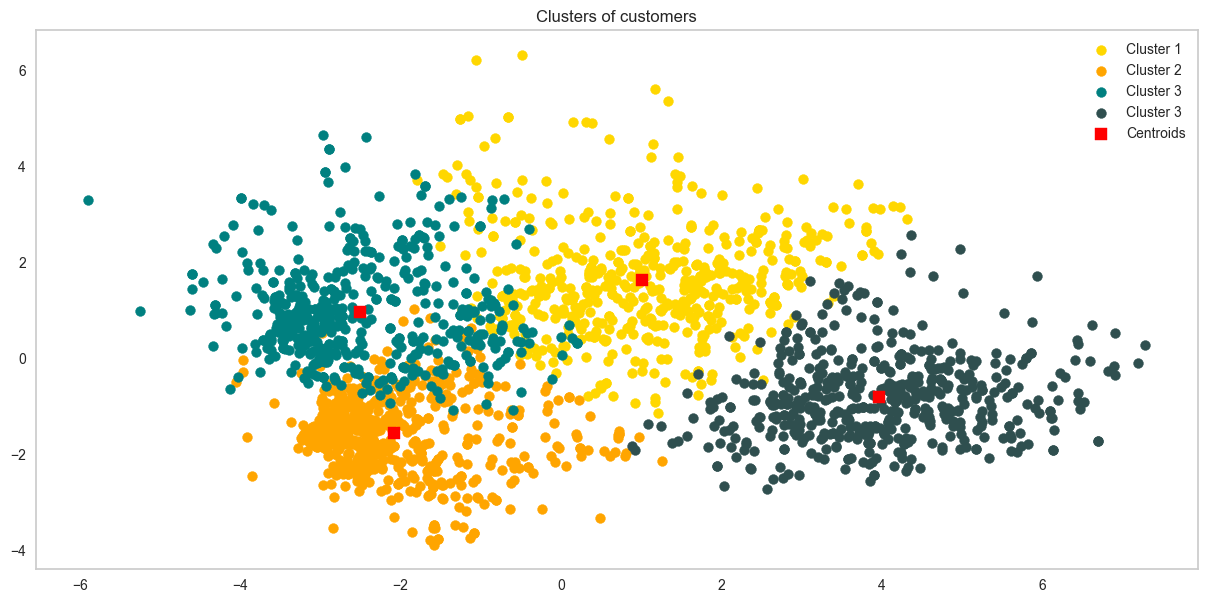

In [44]:
# Visualising the clusters
plt.figure(figsize=(15,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'gold', label = 'Cluster 1',s=50)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'orange', label = 'Cluster 2',s=50)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'teal', label = 'Cluster 3',s=50)
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'darkslategray', label = 'Cluster 3',s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',  label = 'Centroids',s=75,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.legend()
plt.show()


In [45]:
PC['Clusters'] = y_kmeans

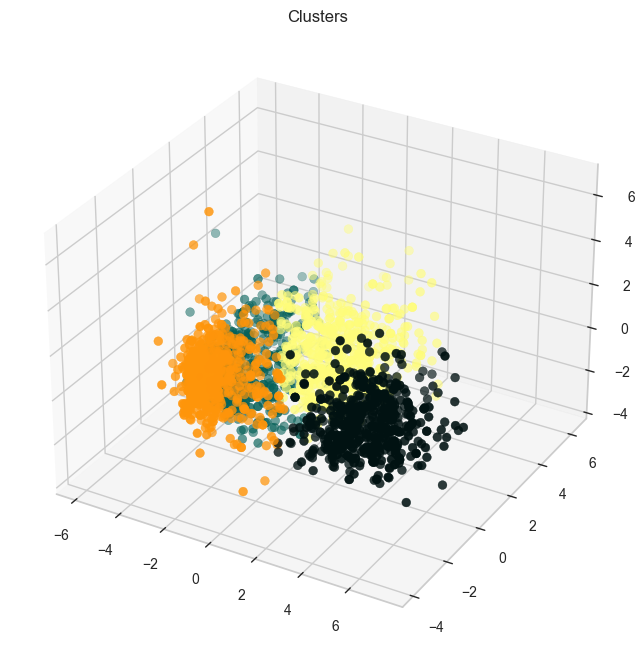

In [46]:
cmap = colors.ListedColormap(["#fffd7a", "#fcd421", "#ff950a", "#66baac", "#066159", "#011212"])

#Plotting the clusters
x =PC["PC1"]
y =PC["PC2"]
z =PC["PC3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PC["Clusters"], marker='o', cmap = cmap )
ax.set_title("Clusters")
#ax.view_init(-140, 60)
plt.show()

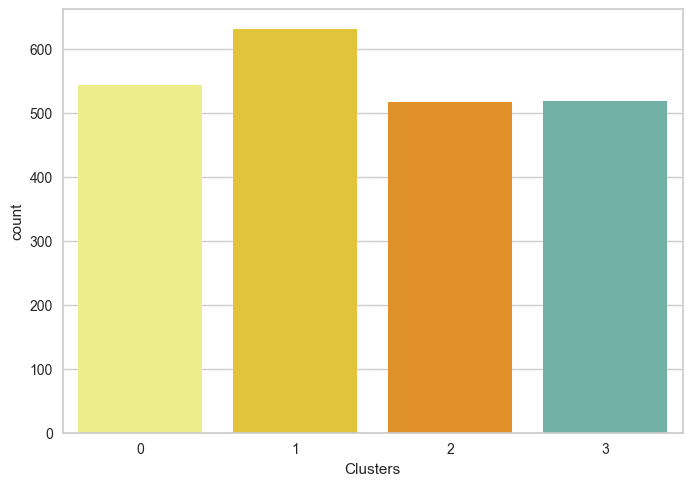

In [47]:
pal = ["#fffd7a", "#fcd421", "#ff950a", "#66baac", "#066159"]
pl = sns.countplot(x=PC["Clusters"], palette= pal)
plt.show()

In [54]:
final['Cluster'] = PC['Clusters']

In [55]:
g = final.groupby(['Cluster'])
c1 = g.get_group(0)
c2 = g.get_group(1)
c3= g.get_group(2)
c4= g.get_group(3)

In [56]:
def compare(df, ft):
    fig.suptitle(ft)
    sns.distplot(c1[ft], color = "#066159", hist=False)
    sns.distplot(c2[ft], color = "#66baac", hist=False)
    sns.distplot(c3[ft], color = "#ff950a", hist=False)
    sns.distplot(c4[ft], color = "#fcd421", hist=False)
    plt.show()

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

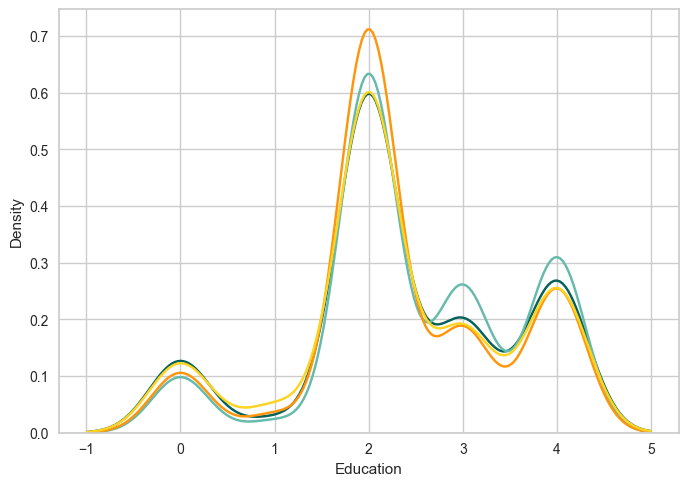

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

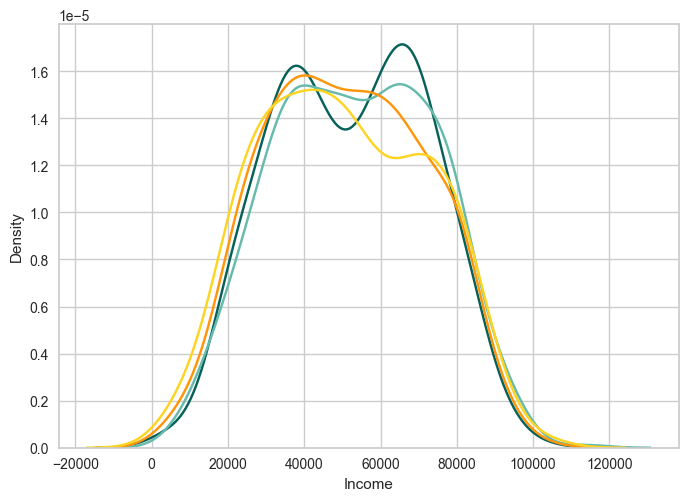

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

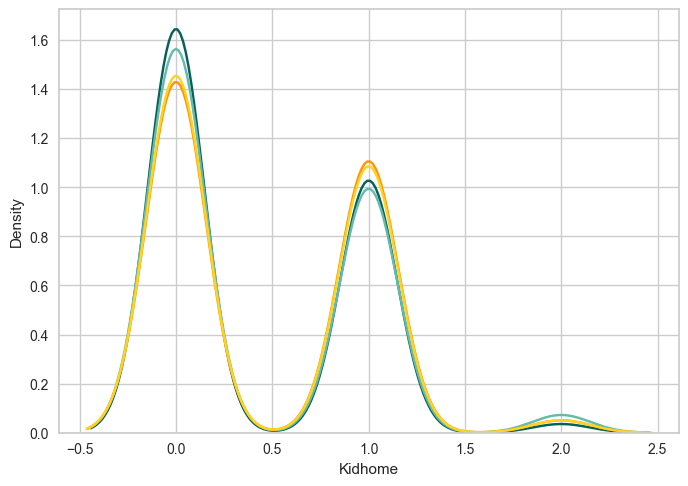

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

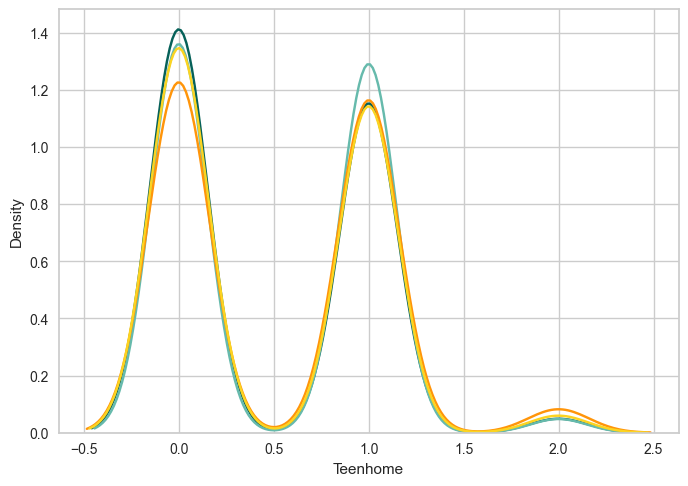

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

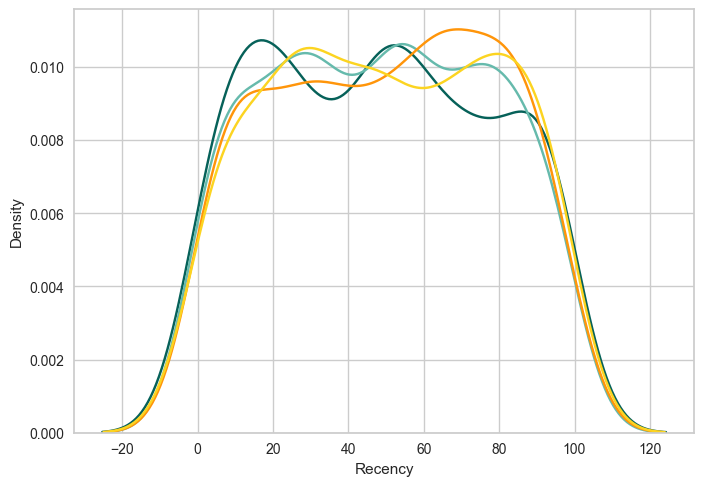

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

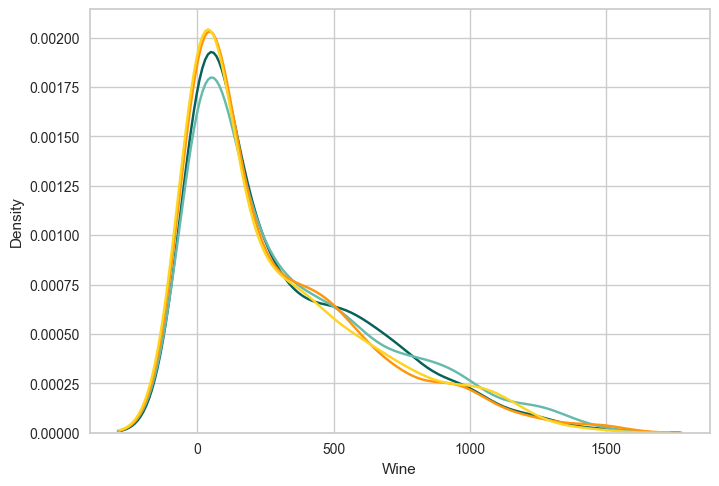

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

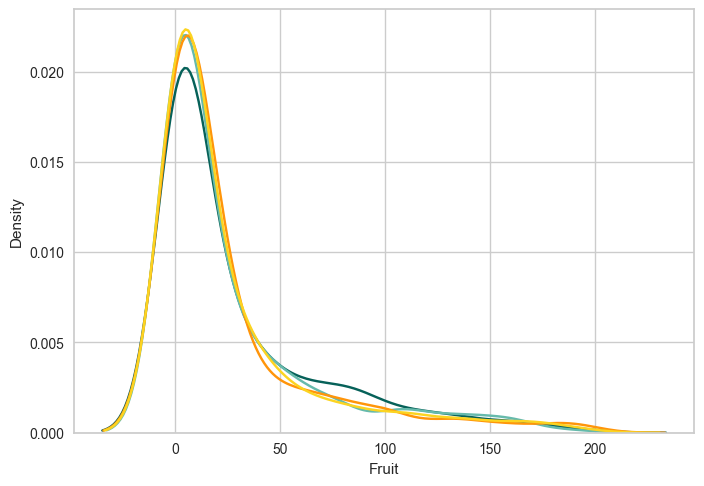

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

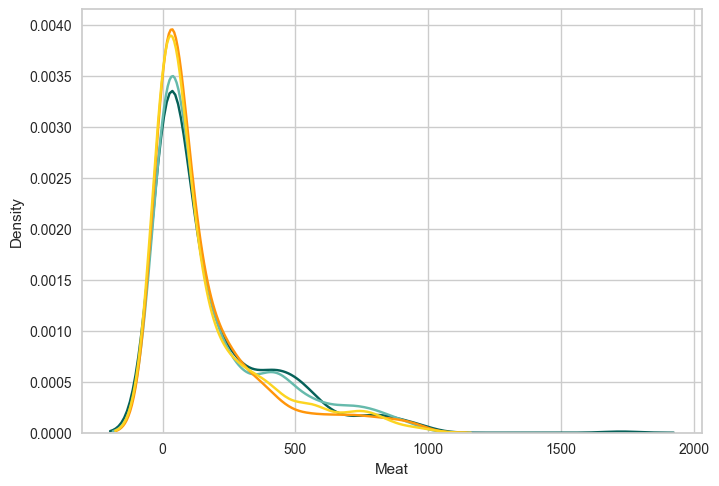

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

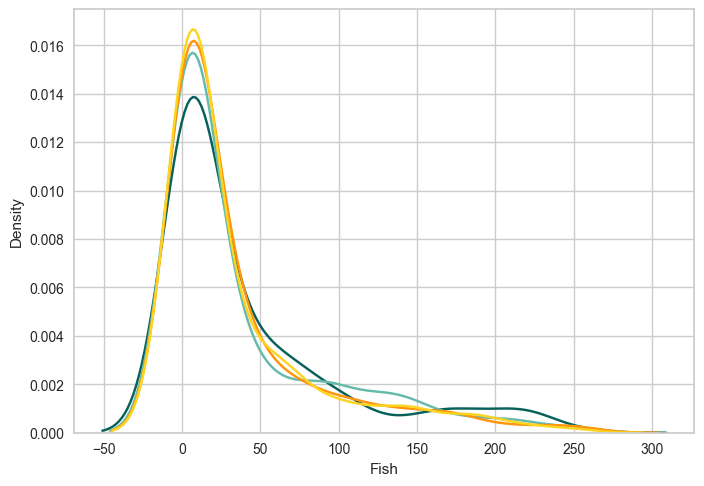

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

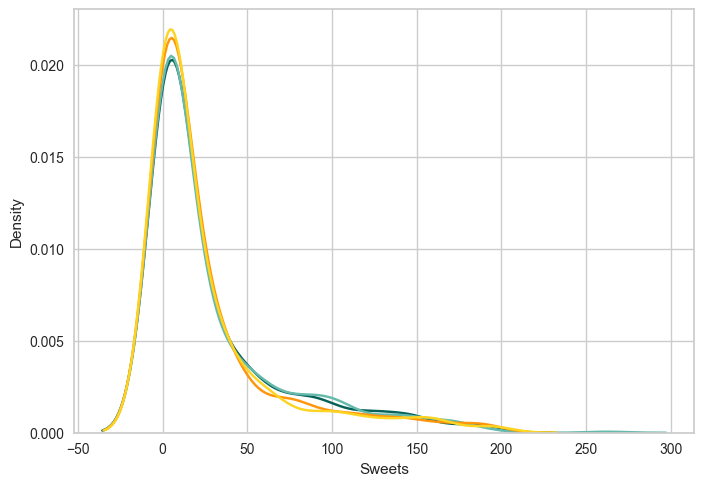

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

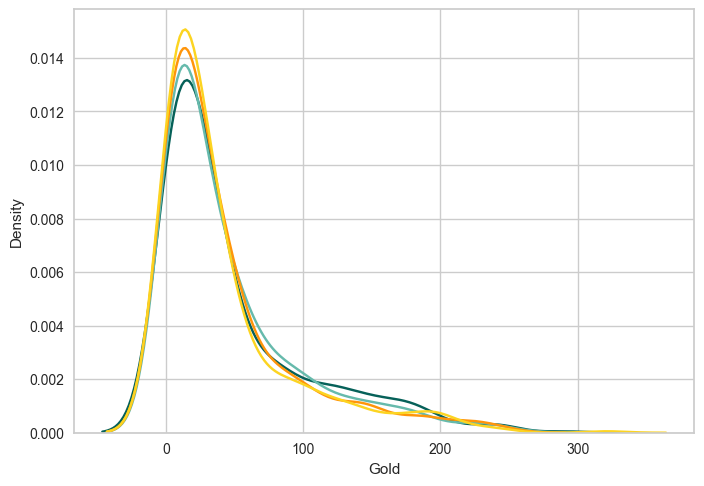

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

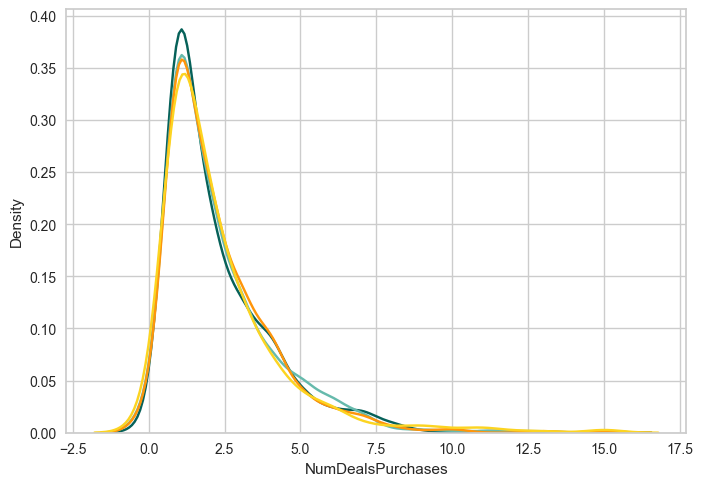

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

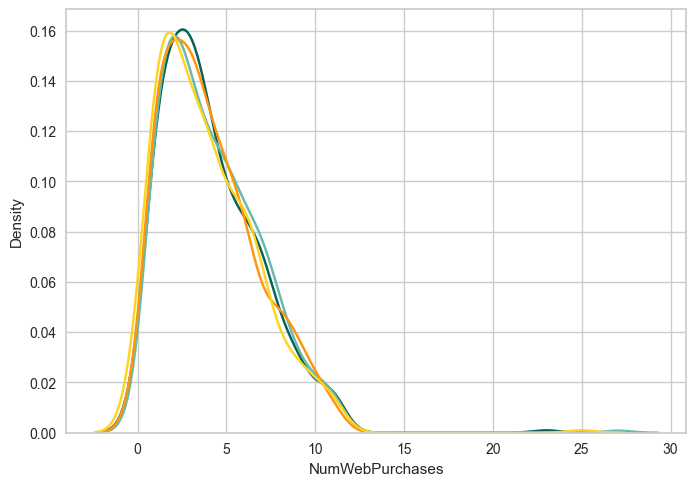

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

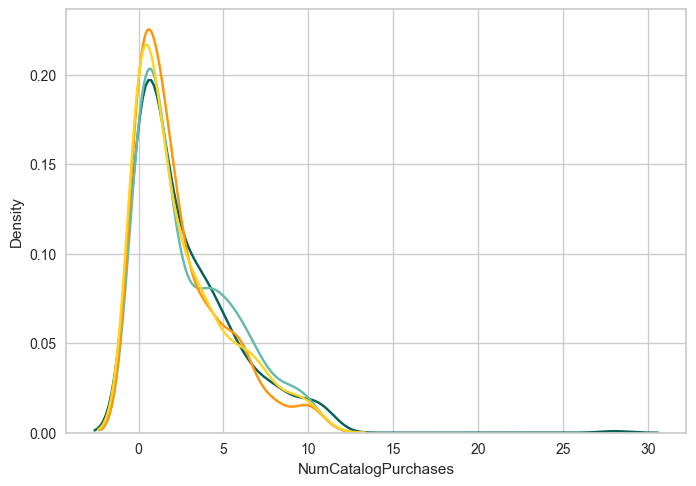

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

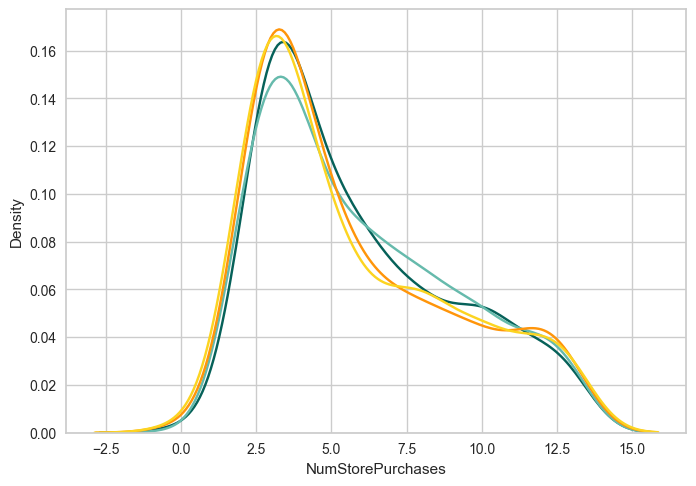

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

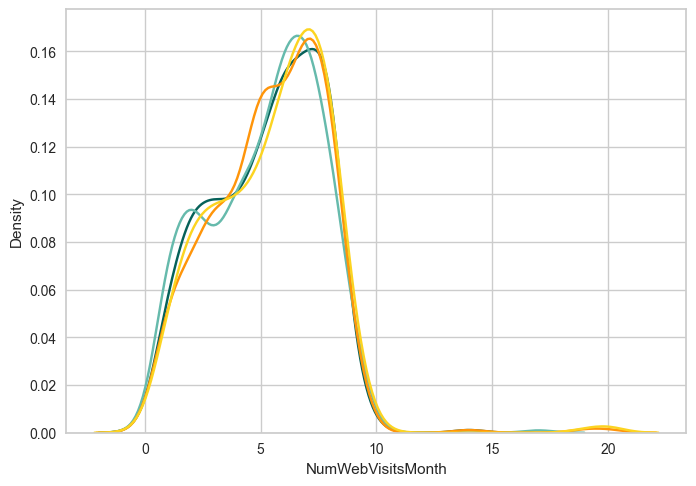

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

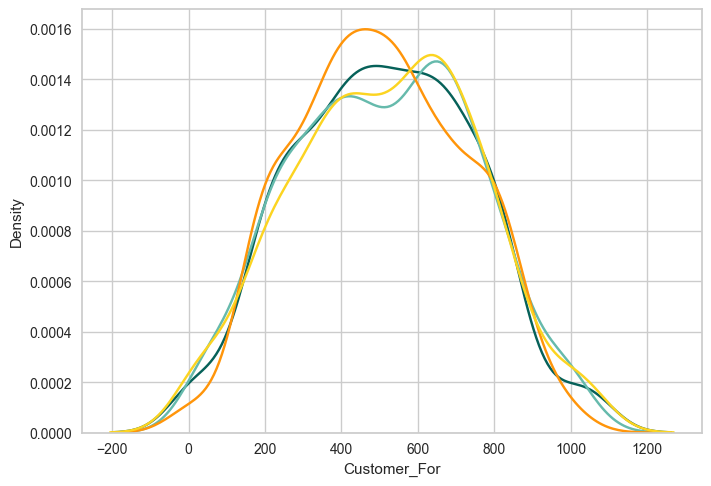

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

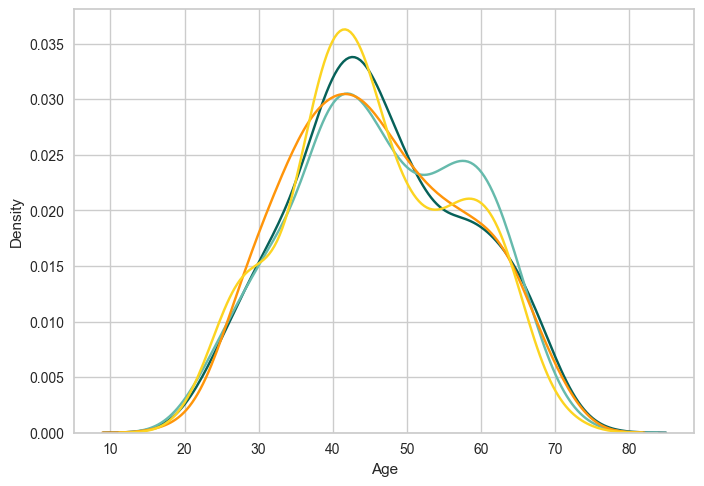

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

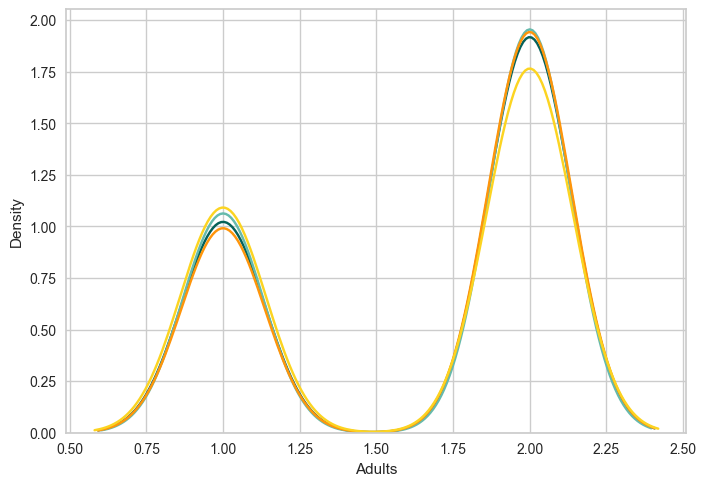

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

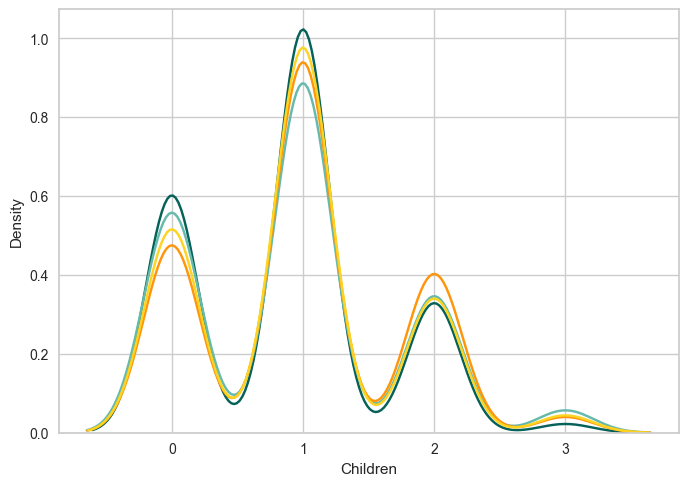

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

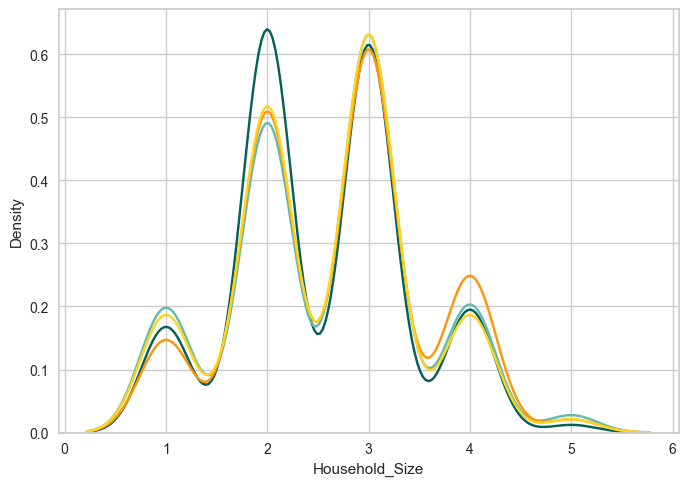

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

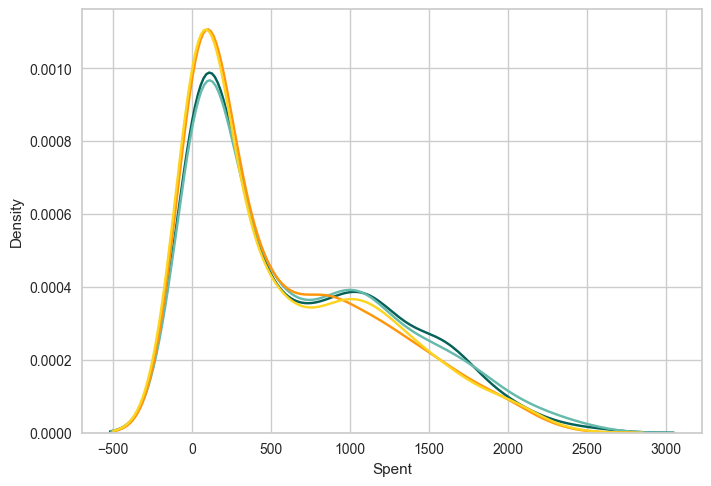

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = "#066159", hist=False)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1346162353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt 

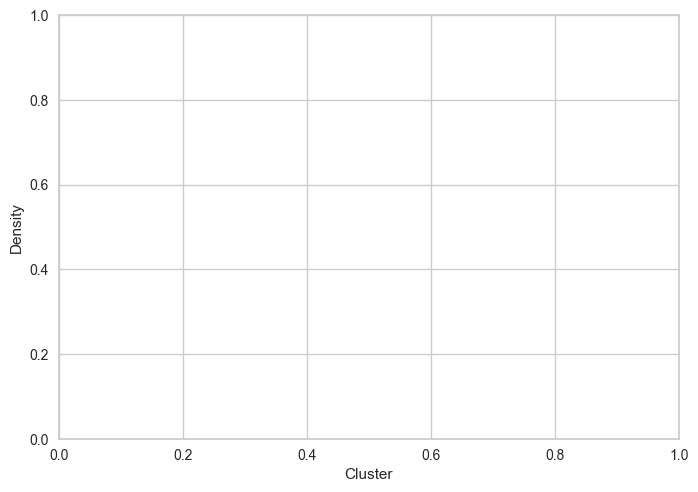

In [57]:
for feature in final:
    compare(final, feature)

In [14]:
def scatter(df, ft):
    pal = ["#fffd7a", "#fcd421", "#ff950a", "#66baac", "#066159"]
    pl = sns.scatterplot(final,x=df['Income'], y=df[ft],hue=df["Cluster"], palette= pal)
    pl.set_title("Cluster's Profile")
    plt.legend()
    plt.show()

In [15]:
PC

,PC1,PC2,PC3,Clusters
0,4.745867,-0.192880,2.646023,3
1,-2.807106,0.078940,-1.865251,2
2,2.283541,-0.507770,-0.252795,3
3,-2.652314,-1.542116,-0.926969,1
4,-0.507977,0.072500,-0.023921,0
...,...,...,...,...
2207,2.628819,2.052930,0.519162,0
2208,-2.891405,4.366380,-1.494366,2
2209,2.306756,-1.767961,0.594455,3
2210,1.746356,1.411672,-1.629474,0


In [21]:
for feature in df_cleaned:
    scatter(df_cleaned, feature)

NameError: name 'scatter' is not defined

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10451/1258006236.py:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(data = df_cleaned,x=df_cleaned["Spent"], y=df_cleaned["Income"],hue=df_cleaned["Cluster"], palette= pal)


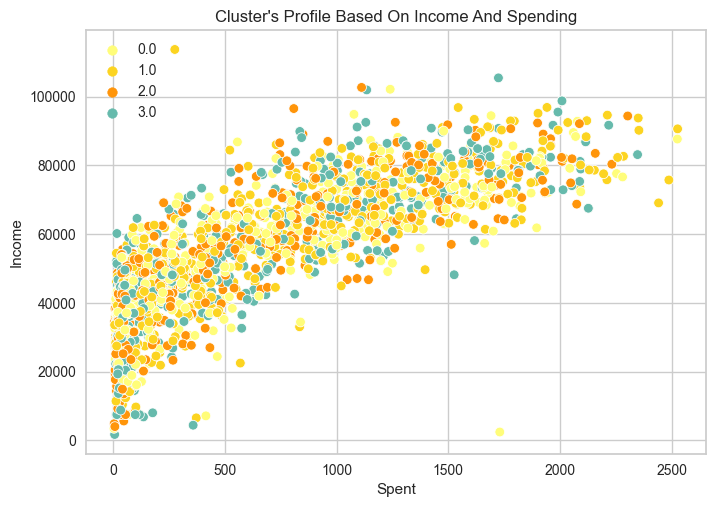

In [16]:
pl = sns.scatterplot(data = df_cleaned,x=df_cleaned["Spent"], y=df_cleaned["Income"],hue=df_cleaned["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [20]:
data = df_cleaned


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use s

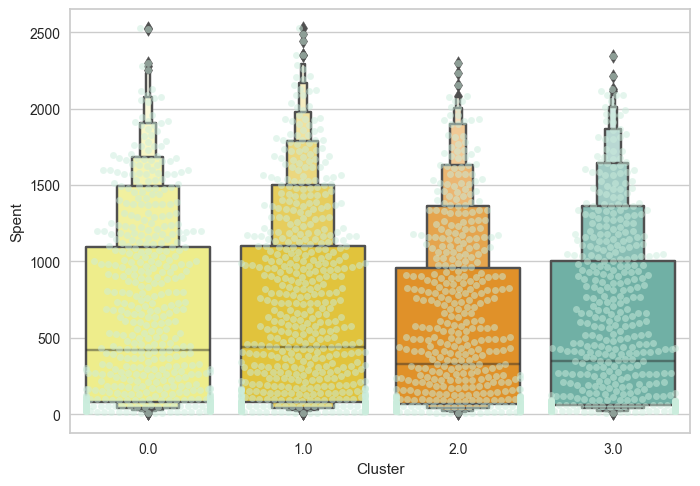

In [22]:
plt.figure()
pl=sns.swarmplot(x=data["Cluster"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Cluster"], y=data["Spent"], palette=pal)
plt.show()